# Final Project Submission

Please fill out:
* Student name: Thiago Bassi
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [11]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import sqlite3
import matplotlib.pyplot as plt
import json
import pickle
import seaborn as sns

In [24]:
# Reading the csv and the tvs, there was ont that was need to put one enconding
bom_movie_gross = pd.read_csv('data/bom.movie_gross.csv')
rt_movie_info = pd.read_csv('data/rt.movie_info.tsv', delimiter = '\t')
rt_reviews = pd.read_csv('data/rt.reviews.tsv', delimiter = '\t', encoding='ISO-8859-1')
tmdb_movies = pd.read_csv('data/tmdb.movies.csv')
tn_movie_budgets = pd.read_csv('data/tn.movie_budgets.csv')


In [25]:
bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [34]:
rt_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [27]:
rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [3]:
tmdb_movies['popularity','vote_count','original_title']

NameError: name 'tmdb_movies' is not defined

In [2]:
tn_movie_budgets

NameError: name 'tn_movie_budgets' is not defined

In [40]:
con = sqlite3.connect('data/im.db')
cursor_obj = con.cursor()

In [41]:

%%bash


sqlite3 data/im.db
.schema

CREATE TABLE IF NOT EXISTS "movie_basics" (
"movie_id" TEXT,
  "primary_title" TEXT,
  "original_title" TEXT,
  "start_year" INTEGER,
  "runtime_minutes" REAL,
  "genres" TEXT
);
CREATE TABLE IF NOT EXISTS "directors" (
"movie_id" TEXT,
  "person_id" TEXT
);
CREATE TABLE IF NOT EXISTS "known_for" (
"person_id" TEXT,
  "movie_id" TEXT
);
CREATE TABLE IF NOT EXISTS "movie_akas" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "title" TEXT,
  "region" TEXT,
  "language" TEXT,
  "types" TEXT,
  "attributes" TEXT,
  "is_original_title" REAL
);
CREATE TABLE IF NOT EXISTS "movie_ratings" (
"movie_id" TEXT,
  "averagerating" REAL,
  "numvotes" INTEGER
);
CREATE TABLE IF NOT EXISTS "persons" (
"person_id" TEXT,
  "primary_name" TEXT,
  "birth_year" REAL,
  "death_year" REAL,
  "primary_profession" TEXT
);
CREATE TABLE IF NOT EXISTS "principals" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "person_id" TEXT,
  "category" TEXT,
  "job" TEXT,
  "characters" TEXT
);
CREATE TABLE IF NOT EXISTS "writers" (
"m

In [42]:
%%bash


sqlite3 data/im.db
.tables



directors      movie_akas     movie_ratings  principals   
known_for      movie_basics   persons        writers      


In [369]:
#creating the queries movies
qr_movie_basics = 'SELECT A.movie_id, B.title, B.region, B.language, B.types, B.attributes, B.is_original_title, A.primary_title, A.original_title, A.start_year, A.runtime_minutes, A.genres FROM movie_basics A , movie_akas B WHERE A.movie_id=B.movie_id'
qr_movie_akas = 'SELECT B.movie_id, B.title, B.region, B.language, B.types, B.attributes, B.is_original_title, A.primary_title, A.original_title, A.start_year, A.runtime_minutes, A.genres, C.averagerating, C.numvotes FROM movie_akas B, movie_basics A, movie_ratings C WHERE B.movie_id=A.movie_id and B.movie_id=C.movie_id' #
qr_movie_ratings = 'SELECT C.movie_id, C.averagerating, C.numvotes FROM movie_ratings C, movie_basics A WHERE C.movie_id=A.movie_id' #

In [583]:
#upload the tables with data movies
tb_movie_basics = pd.read_sql(qr_movie_basics,con)
tb_movie_akas = pd.read_sql(qr_movie_akas,con)
tb_movie_ratings = pd.read_sql(qr_movie_ratings,con)

In [584]:
#creating the queries person
qr_persons = 'SELECT * FROM persons' # DONE
qr_directors = 'SELECT A.movie_id, A.person_id, B.primary_name, B.birth_year, B.death_year, B.primary_profession, D.title, D.region, D.language, D.types, D.attributes, D.is_original_title, E.primary_title, E.original_title, E.start_year, E.runtime_minutes, E.genres, C.averagerating, C.numvotes FROM directors A, persons B, movie_ratings C, movie_akas D, movie_basics E WHERE A.person_id=B.person_id AND A.movie_id=D.movie_id AND C.movie_id=D.movie_id AND E.movie_id=D.movie_id' #
qr_writers = 'SELECT A.movie_id, A.person_id, B.primary_name, B.birth_year, B.death_year, B.primary_profession, D.title, D.region, D.language, D.types, D.attributes, D.is_original_title, E.primary_title, E.original_title, E.start_year, E.runtime_minutes, E.genres, C.averagerating, C.numvotes FROM writers A, persons B, movie_ratings C, movie_akas D, movie_basics E WHERE A.person_id=B.person_id  AND A.movie_id=D.movie_id AND C.movie_id=D.movie_id AND E.movie_id=D.movie_id'
qr_known_for = 'SELECT A.movie_id, A.person_id, B.primary_name, B.birth_year, B.death_year, B.primary_profession, D.title, D.region, D.language, D.types, D.attributes, D.is_original_title, E.primary_title, E.original_title, E.start_year, E.runtime_minutes, E.genres, C.averagerating, C.numvotes FROM known_for A, persons B, movie_ratings C, movie_akas D, movie_basics E WHERE A.person_id=B.person_id  AND A.movie_id=D.movie_id AND C.movie_id=D.movie_id AND E.movie_id=D.movie_id' #DONE
qr_principals = 'SELECT A.movie_id, A.person_id, A.category, A.job, A.characters, B.primary_name, B.birth_year, B.death_year, B.primary_profession, D.title, D.region, D.language, D.types, D.attributes, D.is_original_title, E.primary_title, E.original_title, E.start_year, E.runtime_minutes, E.genres, C.averagerating, C.numvotes FROM principals A, persons B, movie_ratings C, movie_akas D, movie_basics E WHERE A.person_id=B.person_id  AND A.movie_id=D.movie_id AND C.movie_id=D.movie_id AND E.movie_id=D.movie_id' #DONE

In [585]:
#upload the tables with data person
tb_persons = pd.read_sql(qr_persons,con)
tb_directors = pd.read_sql(qr_directors,con)
tb_writers = pd.read_sql(qr_writers,con)
tb_principals = pd.read_sql(qr_principals,con)
tb_known_for = pd.read_sql(qr_known_for,con)

In [592]:
#spliting genres at persons table
tb_writers['genres_split'] = tb_writers['genres'].str.split(",")
tb_directors['genres_split'] = tb_directors['genres'].str.split(",")
tb_principals['genres_split'] = tb_principals['genres'].str.split(",")
tb_known_for['genres_split'] = tb_known_for['genres'].str.split(",")

In [593]:
#spliting primary pofession at persons table
tb_writers['primary_profession_split'] = tb_writers['primary_profession'].str.split(",")
tb_directors['primary_profession_split'] = tb_directors['primary_profession'].str.split(",")
tb_principals['primary_profession_split'] = tb_principals['primary_profession'].str.split(",")
tb_known_for['primary_profession_split'] = tb_known_for['primary_profession'].str.split(",")

In [594]:
#spliting genres at movies table
tb_movie_akas['genres_split'] = tb_movie_akas['genres'].str.split(",")
tb_movie_basics['genres_split'] = tb_movie_basics['genres'].str.split(",")

In [596]:
# separating the genres and primary at person table
tb_writers_tot = tb_writers.explode('genres_split')
tb_directors_tot = tb_directors.explode('genres_split')
tb_principals_tot = tb_principals.explode('genres_split')
tb_known_for_tot = tb_known_for.explode('genres_split')
tb_writers_tot = tb_writers_tot.explode('primary_profession_split')
tb_directors_tot = tb_directors_tot.explode('primary_profession_split')
tb_principals_tot = tb_principals_tot.explode('primary_profession_split')
tb_known_for_tot = tb_known_for_tot.explode('primary_profession_split')

In [ ]:
# separating the genres at movies table
tb_movies_tot = tb_movie_akas.explode('genres_split')

In [ ]:
cat_cols =  ['primary_profession','region','language','types','attributes','genres','genres_split','primary_profession_split']

tb_writers_tot[cat_cols] = \
tb_writers_tot[cat_cols].astype('category')
tb_directors_tot[cat_cols] = \
tb_directors_tot[cat_cols].astype('category')
tb_principals_tot[cat_cols] = \
tb_principals_tot[cat_cols].astype('category')
tb_known_for_tot[cat_cols] = \
tb_known_for_tot[cat_cols].astype('category')

In [604]:
tb_writers_tot.info()
tb_writers_tot.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3970627 entries, 0 to 699717
Data columns (total 21 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   movie_id                  object  
 1   person_id                 object  
 2   primary_name              object  
 3   birth_year                float64 
 4   death_year                float64 
 5   primary_profession        category
 6   title                     object  
 7   region                    category
 8   language                  category
 9   types                     category
 10  attributes                category
 11  is_original_title         float64 
 12  primary_title             object  
 13  original_title            object  
 14  start_year                int64   
 15  runtime_minutes           float64 
 16  genres                    category
 17  averagerating             float64 
 18  numvotes                  int64   
 19  genres_split              category
 20  pri

,birth_year,death_year,is_original_title,start_year,runtime_minutes,averagerating,numvotes
count,1.646627e+06,154582.000000,3.970627e+06,3.970627e+06,3.877281e+06,3.970627e+06,3.970627e+06
mean,1.961816e+03,1978.785221,1.139581e-01,2.014145e+03,1.030775e+02,6.163128e+00,5.301072e+04
std,2.905267e+01,71.814285,3.177604e-01,2.476214e+00,2.177981e+01,1.195388e+00,1.302787e+05
min,9.730000e+02,17.000000,0.000000e+00,2.010000e+03,4.000000e+00,1.000000e+00,5.000000e+00
25%,1.958000e+03,1977.000000,0.000000e+00,2.012000e+03,9.000000e+01,5.400000e+00,1.430000e+02
50%,1.968000e+03,1998.000000,0.000000e+00,2.014000e+03,9.900000e+01,6.300000e+00,1.824000e+03
75%,1.975000e+03,2014.000000,0.000000e+00,2.016000e+03,1.150000e+02,7.000000e+00,3.042000e+04
max,2.005000e+03,2019.000000,1.000000e+00,2.019000e+03,1.440000e+03,1.000000e+01,1.841066e+06


In [603]:
tb_directors_tot.info()
tb_directors_tot.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4502683 entries, 0 to 722937
Data columns (total 21 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   movie_id                  object  
 1   person_id                 object  
 2   primary_name              object  
 3   birth_year                float64 
 4   death_year                float64 
 5   primary_profession        category
 6   title                     object  
 7   region                    category
 8   language                  category
 9   types                     category
 10  attributes                category
 11  is_original_title         float64 
 12  primary_title             object  
 13  original_title            object  
 14  start_year                int64   
 15  runtime_minutes           float64 
 16  genres                    category
 17  averagerating             float64 
 18  numvotes                  int64   
 19  genres_split              category
 20  pri

,birth_year,death_year,is_original_title,start_year,runtime_minutes,averagerating,numvotes
count,2.351700e+06,38862.000000,4.502683e+06,4.502683e+06,4.393338e+06,4.502683e+06,4.502683e+06
mean,1.966584e+03,2015.104884,1.150587e-01,2.014147e+03,1.031168e+02,6.187320e+00,5.115114e+04
std,1.112904e+01,3.328411,3.190928e-01,2.485530e+00,1.012675e+02,1.194378e+00,1.276751e+05
min,1.870000e+03,1944.000000,0.000000e+00,2.010000e+03,3.000000e+00,1.000000e+00,5.000000e+00
25%,1.960000e+03,2014.000000,0.000000e+00,2.012000e+03,9.000000e+01,5.400000e+00,1.400000e+02
50%,1.968000e+03,2015.000000,0.000000e+00,2.014000e+03,9.900000e+01,6.300000e+00,1.711000e+03
75%,1.974000e+03,2017.000000,0.000000e+00,2.016000e+03,1.150000e+02,7.000000e+00,2.764800e+04
max,2.004000e+03,2019.000000,1.000000e+00,2.019000e+03,5.142000e+04,1.000000e+01,1.841066e+06


In [ ]:
tb_principals_tot.info()
tb_principals_tot.describe()


In [ ]:
tb_known_for_tot.info()
tb_known_for_tot.describe()

In [616]:
#Creating the field all titles
tb_writers_tot['all_titles'] = list(tb_writers_tot.groupby(['movie_id'])['title'].transform(lambda x: '^*^'.join(x)))
tb_directors_tot['all_titles'] = list(tb_directors_tot.groupby(['movie_id'])['title'].transform(lambda x: '^*^'.join(x)))
tb_principals_tot['all_titles'] = list(tb_principals_tot.groupby(['movie_id'])['title'].transform(lambda x: '^*^'.join(x)))
tb_known_for_tot['all_titles'] = list(tb_known_for_tot.groupby(['movie_id'])['title'].transform(lambda x: '^*^'.join(x)))
tb_movie_akas['all_titles'] = list(tb_movie_akas.groupby(['movie_id'])['title'].transform(lambda x: '^*^'.join(x)))
tb_movie_basics['all_titles'] = list(tb_movie_basics.groupby(['movie_id'])['title'].transform(lambda x: '^*^'.join(x)))

In [1]:
tb_writers_tot['all_titles'] = list(tb_writers_tot.groupby(['movie_id'])['title'].transform(lambda x: ';'.join(x)))
tb_writers_tot['all_titles_split'] = tb_writers_tot['all_titles'].str.split(';')

NameError: name 'tb_writers_tot' is not defined

In [619]:
#make all_titles into a list
tb_writers_tot['all_titles_split'] = tb_writers_tot['all_titles'].str.split("^*^")
tb_directors_tot['all_titles_split'] = tb_directors_tot['all_titles'].str.split("^*^")
tb_principals_tot['all_titles_split'] = tb_principals_tot['all_titles'].str.split("^*^")
tb_known_for_tot['all_titles_split'] = tb_known_for_tot['all_titles'].str.split("^*^")

error: nothing to repeat at position 1

In [613]:
tb_writers_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3970627 entries, 0 to 699717
Data columns (total 22 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   movie_id                  object  
 1   person_id                 object  
 2   primary_name              object  
 3   birth_year                float64 
 4   death_year                float64 
 5   primary_profession        category
 6   title                     object  
 7   region                    category
 8   language                  category
 9   types                     category
 10  attributes                category
 11  is_original_title         float64 
 12  primary_title             object  
 13  original_title            object  
 14  start_year                int64   
 15  runtime_minutes           float64 
 16  genres                    category
 17  averagerating             float64 
 18  numvotes                  int64   
 19  genres_split              category
 20  pri

In [607]:
# separating only the movies that are the principal name
tb_o_writers_tot = tb_writers_tot[tb_writers_tot['is_original_title'] == 1]
tb_o_directors_tot = tb_directors_tot[tb_directors_tot['is_original_title'] == 1]
tb_o_principals_tot = tb_principals_tot[tb_principals_tot['is_original_title'] == 1]
tb_o_known_for_tot = tb_known_for_tot[tb_known_for_tot['is_original_title'] == 1]

In [374]:
cat_cols =  ['genres','region','language','types','attributes']
tables_person =  ['tb_o_writers_tot','tb_o_directors_tot','tb_o_principals_tot','tb_o_known_for_tot']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   movie_id           331703 non-null  object  
 1   title              331703 non-null  object  
 2   region             278410 non-null  category
 3   language           41715 non-null   category
 4   types              168447 non-null  category
 5   attributes         14925 non-null   category
 6   is_original_title  331678 non-null  float64 
 7   primary_title      331703 non-null  object  
 8   original_title     331690 non-null  object  
 9   start_year         331703 non-null  int64   
 10  runtime_minutes    300806 non-null  float64 
 11  genres             327844 non-null  category
 12  genres_split       327844 non-null  object  
dtypes: category(5), float64(2), int64(1), object(5)
memory usage: 22.5+ MB


In [378]:
tb_movies = tb_movie_akas[tb_movie_akas['is_original_title'] == 1].explode('genres_split')
tb_movies
tb_movies_tot = tb_movie_akas.explode('genres_split')
tb_movies_tot

,movie_id,title,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genres_split
0,tt0369610,Джурасик свят,BG,bg,None,None,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Action
0,tt0369610,Джурасик свят,BG,bg,None,None,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Adventure
0,tt0369610,Джурасик свят,BG,bg,None,None,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Sci-Fi
1,tt0369610,Jurashikku warudo,JP,None,imdbDisplay,None,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Action
1,tt0369610,Jurashikku warudo,JP,None,imdbDisplay,None,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261803,tt9827784,Sayonara kuchibiru,JP,None,None,None,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",7.7,6,Romance
261804,tt9827784,Sayonara kuchibiru,None,None,original,None,1.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",7.7,6,Music
261804,tt9827784,Sayonara kuchibiru,None,None,original,None,1.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",7.7,6,Romance
261805,tt9827784,Farewell Song,XWW,en,imdbDisplay,None,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",7.7,6,Music


In [380]:
cat_cols =  ['genres_split','region','language','types','attributes']

tb_movies_tot[cat_cols] = \
tb_movies_tot[cat_cols].astype('category')
tb_movies_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534387 entries, 0 to 261805
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   movie_id           534387 non-null  object  
 1   title              534387 non-null  object  
 2   region             452530 non-null  category
 3   language           76295 non-null   category
 4   types              322728 non-null  category
 5   attributes         27622 non-null   category
 6   is_original_title  534387 non-null  float64 
 7   primary_title      534387 non-null  object  
 8   original_title     534387 non-null  object  
 9   start_year         534387 non-null  int64   
 10  runtime_minutes    518564 non-null  float64 
 11  genres             533202 non-null  object  
 12  averagerating      534387 non-null  float64 
 13  numvotes           534387 non-null  int64   
 14  genres_split       533202 non-null  category
dtypes: category(5), float64(3), int64(

In [403]:
tb_genres_rates = tb_movies_tot[tb_movies_tot['is_original_title']==1][['genres_split','averagerating','numvotes','movie_id','title']]
#[tb_genres_rates['numvotes'] == 0]

In [551]:
tb_genres_rates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68913 entries, 38 to 261804
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   genres_split   68703 non-null  category
 1   averagerating  68913 non-null  float64 
 2   numvotes       68913 non-null  int64   
 3   movie_id       68913 non-null  object  
 4   title          68913 non-null  object  
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 5.2+ MB


In [404]:
tb_genres_rates[tb_genres_rates['numvotes']==tb_genres_rates['numvotes'].max()]

,genres_split,averagerating,numvotes,movie_id,title
7274,Action,8.8,1841066,tt1375666,Inception
7274,Adventure,8.8,1841066,tt1375666,Inception
7274,Sci-Fi,8.8,1841066,tt1375666,Inception


In [405]:
def fun_estimator(input_series):
    
    X_centered = input_series - input_series.mean()
    fun_est = np.abs(X_centered).sum()
    return fun_est


In [569]:
order_gen_num = list(tb_genres_rates.groupby(['genres_split'])['numvotes'].mean().sort_values(ascending = False).head(4).index)
order_gen_ave = list(tb_genres_rates.groupby(['genres_split'])['averagerating'].mean().sort_values(ascending = False).index)


In [539]:
tb_genres_rates.groupby(['genres_split'])['numvotes'].count()

genres_split
Action          4136
Adult              2
Adventure       2449
Animation       1209
Biography       2056
Comedy          8985
Crime           2865
Documentary     7104
Drama          17535
Family          1855
Fantasy         1311
Game-Show          1
History         1516
Horror          3727
Music            920
Musical          293
Mystery         1759
News             196
Reality-TV         2
Romance         3662
Sci-Fi          1227
Sport            568
Thriller        4628
War              560
Western          137
Name: numvotes, dtype: int64

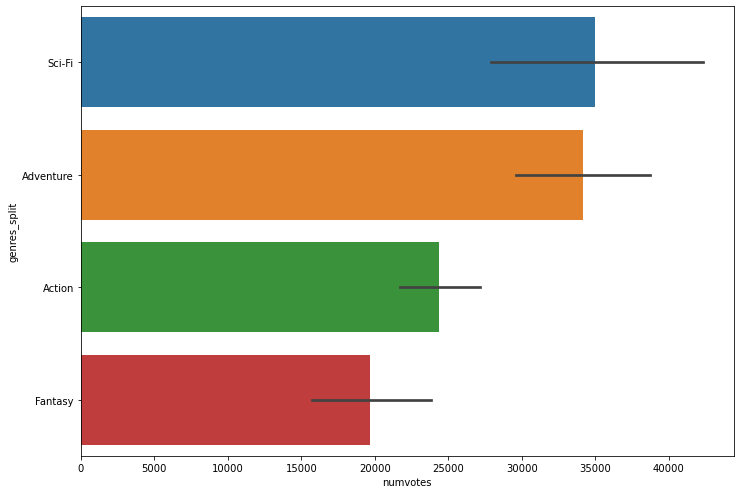

In [570]:
order = order_gen_num
x = 'numvotes'
y = 'genres_split'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.barplot(y = y , x = x, data = tb_genres_rates,order = order, ax=ax)
plt.show()

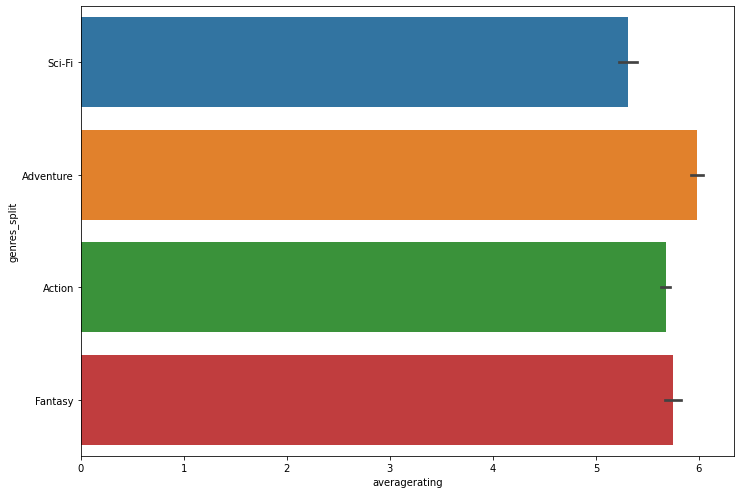

In [571]:
order = order_gen_num
x = 'averagerating'
y = 'genres_split'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.barplot(y = y , x = x, data = tb_genres_rates,order = order, ax=ax)
plt.show()

/Users/thiagobassi/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/thiagobassi/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


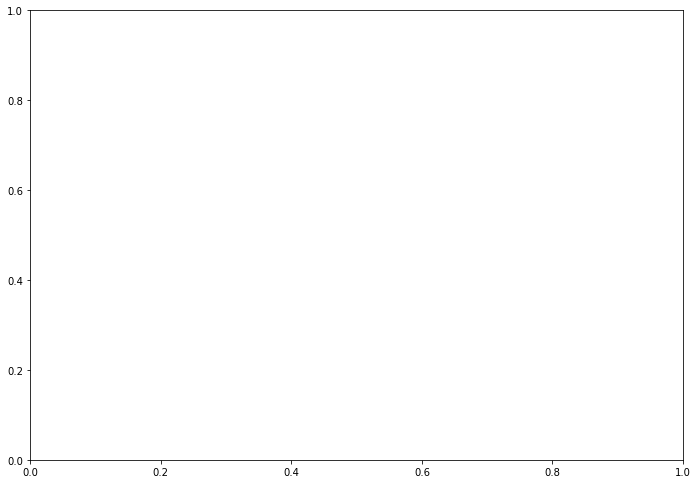

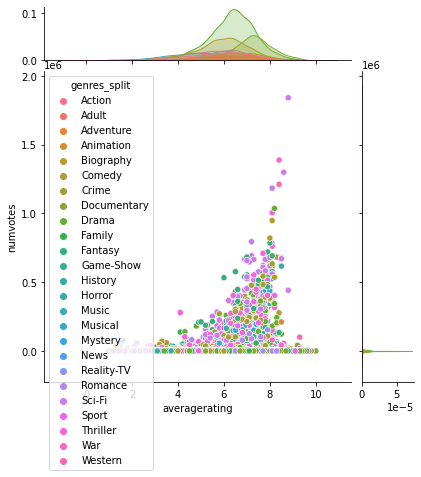

In [575]:
order = order_gen_num
x = 'averagerating'
y = 'numvotes'
hue = 'genres_split'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.jointplot(x = x, y = y, hue = hue, marginal_ticks=True, data = tb_genres_rates)
plt.show()

In [559]:
tb_genres_rates[tb_genres_rates['genres_split'] == ['Sci-Fi','Drama']]

ValueError: ('Lengths must match to compare', (68913,), (2,))

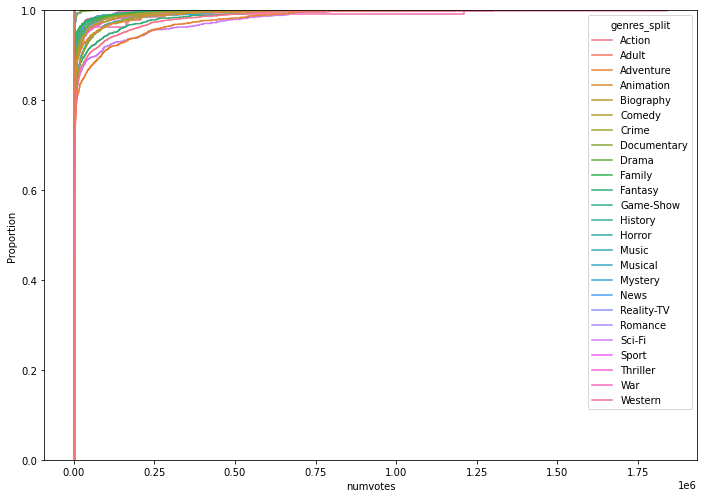

In [552]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.ecdfplot(x = 'numvotes', hue = 'genres_split',data = tb_genres_rates.[tb_genres_rates['genres_split']==[order_gen_num]])
plt.show()

In [459]:
sns.violinplot(x = 'numvotes', y = 'averagerating',
               hue = 'genres_split' 
               data = tb_genres_rates)
plt.show()

SyntaxError: invalid syntax (<ipython-input-459-656535527444>, line 3)

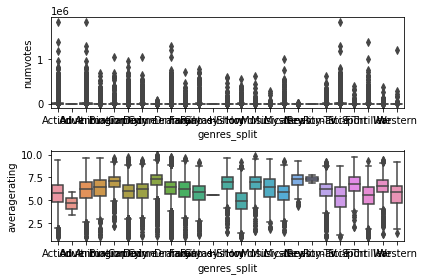

In [408]:
#tb_movie_akas[tb_movie_akas.runtime_minutes == tb_movie_akas.runtime_minutes.max()]
fig, ax = plt.subplots(2,1)
sns.boxplot(x = 'genres_split', y = 'numvotes', data = tb_genres_rates, orient = 'v', ax = ax[0])
sns.boxplot(x = 'genres_split', y = 'averagerating', data = tb_genres_rates, orient = 'v', ax = ax[1])
plt.tight_layout()

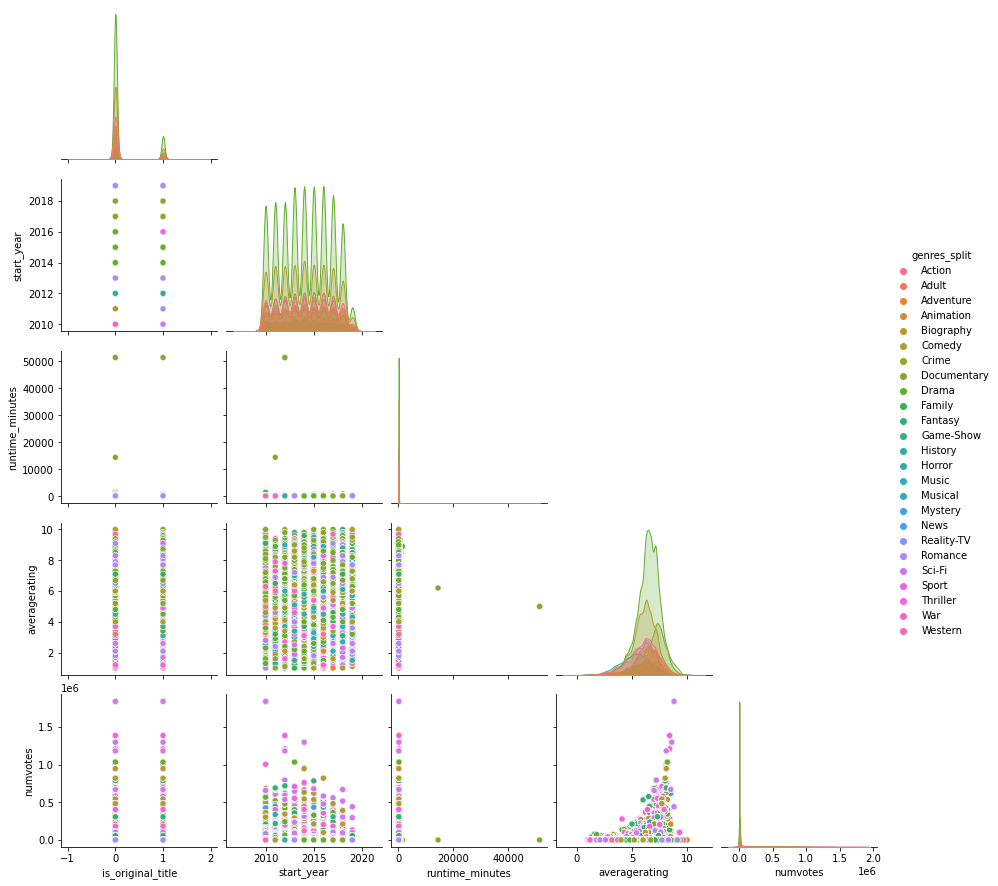

In [386]:
sns.pairplot(tb_movies_tot, hue = 'genres_split', 
             corner = True)
plt.show()

In [337]:
tb_movie_akas.dropna(subset = ['genres_split'], inplace = True)

ValueError: columns must be unique

In [363]:
tb_movie_akas.explode('genres_split')

ValueError: columns must be unique

In [241]:
tb_writers[tb_writers['person_id'] == tb_principals.person_id[tb_principals['category'] == 'writer']]

ValueError: Can only compare identically-labeled Series objects

DatabaseError: Execution failed on sql 'SELECT B.movie_id, B.title, B.region, B.language, B.types, B.atribute, B.is_original_title, A.movie_id, A.primary_title, A.original_title, A.start_year, A.runtime_minutes, A.genres, C.averagerating, C.numvotes FROM movie_akas B, movie_basics A, movie_ratings C WHERE B.movie_id=A.movie_id and B.movie_id=C.movie_id': no such column: B.atribute

In [ ]:
qr_geral_people = 'SELECT * FROM tb_persons B where B.person_id ' 

tb_geral_people= pd.read_sql(qr_geral_people, con)

tb_geral_people

In [ ]:
A tb_movie_basics A where A.movie_id (MAIN)
B tb_persons B where B.person_id (MAIN)

A - tb_movie_ratings C where C.movie_id=A.movie_id
B / A - tb_directors D where D.movie_id=A.movie_id and D.person_id=B.person_id
A - tb_movie_akas F where F.movie_id=A.movie_id
B / A - tb_principals E where E.movie_id=A.movie_id and E.person_id=B.person_id
B / A tb_writers G where G.movie_id=A.movie_id and G.person_id=B.person_id
B / A tb_known_for H where H.movie_id=A.movie_id and H.person_id=B.person_id

In [224]:
tb_movie_basics['start_year'].min()
tb_movie_basics[(tb_movie_basics['primary_title'].str.contains('Fantastic Beasts', regex=True))]


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
33094,tt3183660,Fantastic Beasts and Where to Find Them,Fantastic Beasts and Where to Find Them,2016,132.0,"Adventure,Family,Fantasy",tt3183660,7.3,365353
43110,tt4123430,Fantastic Beasts: The Crimes of Grindelwald,Fantastic Beasts: The Crimes of Grindelwald,2018,134.0,"Adventure,Family,Fantasy",tt4123430,6.6,163151


In [221]:
#tb_known_for
#tb_movie_basics.info()
#tn_movie_budgets.info()
#bom_movie_gross.info()
tb_known_for[tb_known_for['category']=='writer'].groupby('primary_name')
#write_count = tb_known_for.primary_name[tb_known_for['category']=='writer'].value_counts()
#write_count.head(20)
# tn_movie_budgets[(tn_movie_budgets.domestic_gross == '$0')].head(15)
#tn_movie_budgets['movie'][(tn_movie_budgets.domestic_gross == '$0')]
# bom_movie_gross[(bom_movie_gross.title == tn_movie_budgets['movie'][(tn_movie_budgets.domestic_gross == '$0')])]

In [213]:
genres = list(tb_movie_basics['genres'].str.split())
movie_id =  list(tb_movie_basics['movie_id'])

In [220]:
genres

SyntaxError: invalid syntax (<ipython-input-220-8f8d0c997759>, line 1)

In [125]:
tb_directors.loc[(tb_directors['primary_name']=='Bill Haley')]

,movie_id,person_id,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,priary_name
1,tt0462036,nm1940585,Bill Haley,NaN,NaN,"director,writer,producer",Steve Phoenix: The Untold Story,Steve Phoenix: The Untold Story,2012,110.0,Drama,Bill Haley


In [129]:
#tb_movie_akas
genres_list = list((tb_movie_basics['genres'].value_counts().index))
genres_list
tb_movie_basics['genres'].convert_dtypes()

['Drama',
 'Documentary',
 'Comedy',
 'Horror',
 'Comedy,Drama',
 'Thriller',
 'Drama,Romance',
 'Comedy,Romance',
 'Comedy,Drama,Romance',
 'Horror,Thriller',
 'Drama,Thriller',
 'Action',
 'Romance',
 'Biography,Documentary',
 'Documentary,Drama',
 'Documentary,Music',
 'Comedy,Horror',
 'Action,Crime,Drama',
 'Crime,Drama,Thriller',
 'Crime,Drama',
 'Family',
 'Biography,Documentary,History',
 'Drama,Family',
 'Documentary,History',
 'Action,Drama',
 'Horror,Mystery,Thriller',
 'Biography,Documentary,Drama',
 'Drama,Horror,Thriller',
 'Animation',
 'Action,Thriller',
 'Action,Comedy',
 'Documentary,Sport',
 'Comedy,Drama,Family',
 'Drama,Mystery,Thriller',
 'Sci-Fi',
 'Crime',
 'Action,Adventure,Comedy',
 'Biography,Drama',
 'Biography,Documentary,Music',
 'Action,Crime,Thriller',
 'Adventure,Animation,Comedy',
 'Action,Drama,Thriller',
 'Comedy,Crime,Drama',
 'Action,Comedy,Crime',
 'Drama,Horror,Mystery',
 'Documentary,News',
 'Drama,History',
 'Crime,Drama,Mystery',
 'Drama,Myste

In [69]:
tb_directors['director_name'] = tb_directors
tb_directors['movie_directed'] = tb_directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [89]:
tb_directors['person_id'].values

array(['nm0899854', 'nm1940585', 'nm0151540', ..., 'nm10123242',
       'nm10123248', 'nm4993825'], dtype=object)

In [8]:
%%bash


sqlite3 data/im.db
.schema

CREATE TABLE IF NOT EXISTS "movie_basics" (
"movie_id" TEXT,
  "primary_title" TEXT,
  "original_title" TEXT,
  "start_year" INTEGER,
  "runtime_minutes" REAL,
  "genres" TEXT
);
CREATE TABLE IF NOT EXISTS "directors" (
"movie_id" TEXT,
  "person_id" TEXT
);
CREATE TABLE IF NOT EXISTS "known_for" (
"person_id" TEXT,
  "movie_id" TEXT
);
CREATE TABLE IF NOT EXISTS "movie_akas" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "title" TEXT,
  "region" TEXT,
  "language" TEXT,
  "types" TEXT,
  "attributes" TEXT,
  "is_original_title" REAL
);
CREATE TABLE IF NOT EXISTS "movie_ratings" (
"movie_id" TEXT,
  "averagerating" REAL,
  "numvotes" INTEGER
);
CREATE TABLE IF NOT EXISTS "persons" (
"person_id" TEXT,
  "primary_name" TEXT,
  "birth_year" REAL,
  "death_year" REAL,
  "primary_profession" TEXT
);
CREATE TABLE IF NOT EXISTS "principals" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "person_id" TEXT,
  "category" TEXT,
  "job" TEXT,
  "characters" TEXT
);
CREATE TABLE IF NOT EXISTS "writers" (
"m

In [ ]:
query = cursor_obj.execute("""
SELECT * 
FROM airports 
LIMIT 5
""")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3970627 entries, 0 to 699717
Data columns (total 21 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   movie_id                  object 
 1   person_id                 object 
 2   primary_name              object 
 3   birth_year                float64
 4   death_year                float64
 5   primary_profession        object 
 6   title                     object 
 7   region                    object 
 8   language                  object 
 9   types                     object 
 10  attributes                object 
 11  is_original_title         float64
 12  primary_title             object 
 13  original_title            object 
 14  start_year                int64  
 15  runtime_minutes           float64
 16  genres                    object 
 17  averagerating             float64
 18  numvotes                  int64  
 19  genres_split              object 
 20  primary_profession_split 

,birth_year,death_year,is_original_title,start_year,runtime_minutes,averagerating,numvotes
count,1.646627e+06,154582.000000,3.970627e+06,3.970627e+06,3.877281e+06,3.970627e+06,3.970627e+06
mean,1.961816e+03,1978.785221,1.139581e-01,2.014145e+03,1.030775e+02,6.163128e+00,5.301072e+04
std,2.905267e+01,71.814285,3.177604e-01,2.476214e+00,2.177981e+01,1.195388e+00,1.302787e+05
min,9.730000e+02,17.000000,0.000000e+00,2.010000e+03,4.000000e+00,1.000000e+00,5.000000e+00
25%,1.958000e+03,1977.000000,0.000000e+00,2.012000e+03,9.000000e+01,5.400000e+00,1.430000e+02
50%,1.968000e+03,1998.000000,0.000000e+00,2.014000e+03,9.900000e+01,6.300000e+00,1.824000e+03
75%,1.975000e+03,2014.000000,0.000000e+00,2.016000e+03,1.150000e+02,7.000000e+00,3.042000e+04
max,2.005000e+03,2019.000000,1.000000e+00,2.019000e+03,1.440000e+03,1.000000e+01,1.841066e+06
